# Measuring Income Inequality



In these exercises, we will load and work with a vector that contains estimates of the total income (from all sources) of a random sample of American households collected by the U.S. Census Bureau in 2019 as part of the American Community Survey (ACS).

In particular, we are going to use this data to measure household income inequality in the United States, then analyze how that income inequality might change under a range of different tax policies.

(Apologies to people who are not from the United States—the United States had some of the cleanest and the easiest household data to work with in the world, and our modal student (after we remove students from countries that don't have similar data) is American, to so picking the United States seemed like the least bad option. 

However, if you are interested in completing these same exercises for your own country, head over to [IPUMS International](https://international.ipums.org/international/) to see if analogous income data has been made available by your country's Census Bureau. Simply click on the "Browse Data" button, then "Select Sample" in the top left to find the most recent data available for your country. Then see if you can find income data under the "Select Harmonized Variables" "PERSON" or "HOUSEHOLD" drop-down menus. Note that income data is hard to collect, so it's probably not available for most countries.)

## Exercise 0

Welcome to your first autograded exercise!

Please **begin by reading the** [course autograder guidelines](https://www.practicaldatascience.org/html/ids720_specific/autograder_guidelines.html). Read them *carefully* please!

Then please also read the guidelines for [writing good notebooks.](https://practicaldatascience.org/html/notebooks/PDS_not_yet_in_coursera/20_programming_concepts/writing_good_jupyter_notebooks.html)

For this assignment, please name your file `exercise_numpy_vectors.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}
```

### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out due to problems like the file not having the right name will **not** count against this total.


## Exercise 1

Using `np.loadtxt()`, load the vector of household incomes located at [https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt](https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt). Please load the data by passing that URL directly into `np.loadtxt()` as a string—the autograder we're using needs to be able to run your code remotely, which it can't do if it references a file on your hard drive.



In [1]:
import numpy as np

incomes = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data"
    "/us_household_incomes.txt"
)

## Exercise 2

One of the best ways we have for getting a feel for our data is to plot our data. We will talk much more extensively about plotting in upcoming lessons, but for the moment it's sufficient to know that you can plot a histogram of a numpy vector with:

```python
from matplotlib import pyplot as plt
plt.hist(your_array)
```

Use this `plt.hist()` method to plot your income data. Does it look like a normal distribution? Uniform? Does this make you think that in common equality is relatively high or low in the United States?

**Note:** The x-axis' will range will be determined by the data, with the x-axis being made long enough to include ALL data (but no longer). As a result, there *are* observations across the x-axis, even if there are too few for the bar to be visible.

**Note:** Be aware that this data only measures *income*—e.g., wages, salaries, etc. As a result, it actually massively underestimates incomes at the top of the United States income distribution because most of the income for high earners comes in the form of capital gains and investment appreciation which are not included here.


(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

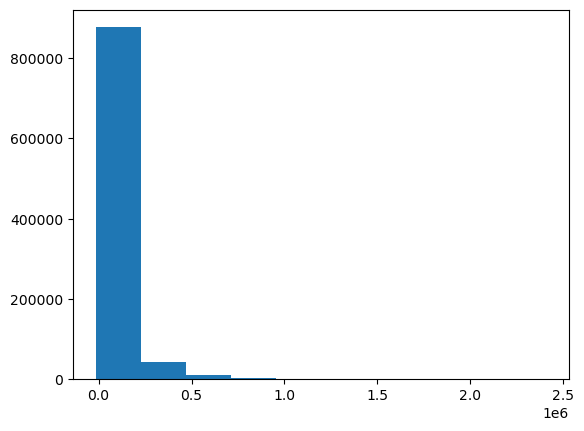

In [2]:
from matplotlib import pyplot as plt

plt.hist(incomes)

## Exercise 3

You will likely notice that much of the plot is difficult to see because most of the plot is taken up by very high earners. 

Since the x-axis of our plot is determined by the range of our data, we can create a histogram of US household incomes that includes only households making less than $500,000 to improve our ability to visualize what's going on at lower incomes. For these households—the non-millionaires—do we see a more uniform distribution of incomes? Or is there still a significant [right-skew / positive-skew](https://en.wikipedia.org/wiki/Skewness) (most people are on the left of the distribution, but there are more extreme values in the right tail) in the income distribution?

In other words, is the skewness in the US income distribution driven by extreme high earners, or is it evident at all income levels?

(Obviously the autograder will not be able to evaluate your answer to this question, but the TAs will).

(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

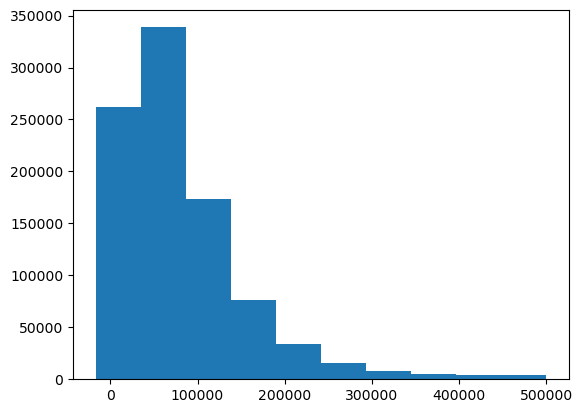

In [3]:
plt.hist(incomes[incomes < 500_000])

(array([ 28779., 164499., 173795., 143583., 111923.,  85298.,  59470.,
         42296.,  29866.,  20199.]),
 array([-16942. ,   4751.3,  26444.6,  48137.9,  69831.2,  91524.5,
        113217.8, 134911.1, 156604.4, 178297.7, 199991. ]),
 <BarContainer object of 10 artists>)

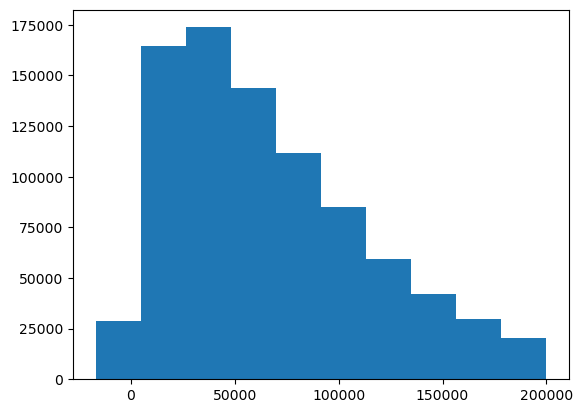

In [4]:
plt.hist(incomes[incomes < 200_000])

> The skewness appears to be persistent throughout most of the income distribution, not just at extreme values.

## Gini Index

A standard measure of inequality is the [Gini Index / Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient). The measure takes on a value of 0 when everyone in a population has the same allocation of some resource or property, and a value of 1 when all the resource in population accrues to a single person. It is commonly used to measure income and wealth inequality, although it is also worth noting that it has been used in many other contexts, [including neuroscience.](https://neuroplausible.com/gini) 

For discrete data, the definition of the Gini Index is given below:

$$Gini\ Index = \frac{2 \sum_{i=1}^n i y_i}{n \sum_{i=1}^n y_i} -\frac{n+1}{n}$$

Where $i$ is each observations' rank ordering from those with the fewest resources to those with the most, and $y_i$ is the resources of observation $i$. 

In an upcoming exercise, you will be asked to code this up yourself in a few different ways, but as that is not the focus of *this* exercise, you can just use the `gini()` function from the `ineqpy` package. You can install it with `pip install ineqpy` (it's a little too small of a package to appear in the conda repositories) and import with `from ineqpy.inequality import gini`.

NOTE: You may get an error saying that you have numpy 2.1 installed, but that ineqpy only works with numpy <= 2.0. To change your numpy install to a specific older version, just run `conda install numpy=2.0` (where the number after `=` is the version you want). Run that to load numpy 2.0 in place of 2.1 so ineqpy will work!

## Exercise 4

The US poverty line is *about* 20,000 dollars a year. What share of households in these data fall below the US poverty line? (By "share" I mean the proportion, a value between 0 and 1).

(I say "about" because the actual poverty line for household income depends on the number of people in the household, which we have not included in these data.)

Using the `gini` function above, calculate the Gini Index of income inequality in the US. What is that value?

Store your share of households under 20,000 as `ex4_share_below_poverty`, store the gini score as `ex4_gini`.


In [5]:
results = dict()
results["ex4_share_below_poverty"] = np.mean(incomes < 20_000)

from ineqpy.inequality import gini

results["ex4_gini"] = gini(incomes)

print(
    "The share of households below the poverty "
    f"line is about {results['ex4_share_below_poverty']:.3}"
)
print(f"The US Gini is {results['ex4_gini']:.4}")

The share of households below the poverty line is about 0.147
The US Gini is 0.4811


## Exercise 5

Go compare your estimate to that of [other countries here.](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) (Note: in this table, estimated Gini values have been multiplied 100. In addition, as a result of sampling variation, income binning, differences in the exact methods used to calculate income, year of data, availability of data on top incomes, etc., your Gini for the US will be somewhat different from the Gini for the US in this table. It *should* be close to the data from the [US Census Bureau](https://www.statista.com/statistics/219643/gini-coefficient-for-us-individuals-families-and-households/)). How does the US compare to other countries? Is that what you expected? 
   - **Note:** The Gini Index of income is only one metric of inequality! Results would be very different if we were to calculate, for example, the ratio of the income of the top 0.1% of earners to the income of the lowest-earning 10% of the population, or if we calculated this metric using wealth instead of income!


> Well, the US isn't the worst, but that's a pretty awful score for one of the richest countries in the world, especially as this data under-estimates incomes at the extreme high end of the distribution. 


## Exercise 6

Congratulations! You have been hired by the President of the United States to advise them on their efforts to reduce income inequality. The first set of policies that the president has asked you to evaluate is whether income inequality would be decreased more under:

- `Policy A`: giving every household that makes less than 40,000 dollars a check for 5,000 dollars, or 
- `Policy B`: giving every household that makes less than 30,000 dollars a check for 7,000 dollars. 

What is the new Gini under Policy A?  Store in the `results` dict under the key `"ex6_gini_policy_a"`.
What is the new Gini under Policy B?  Store in the `results` dict under the key `"ex6_gini_policy_b"`.

Which has lowered inequality more? Store your answer as the string `"Policy A"` or `"Policy B"` in the `results` dict under the key `"ex6_gini_which_reduced_more`.

**Note:** Vectors are mutable (like lists), so you should create a clean copy of your income data with the `.copy()` method (e.g. `experiment1 = income_vector.copy()`) before starting to make changes during each exercise. We'll talk a lot more about vector mutability in a future reading, but so long as you use `.copy()` you will be fine here! 

**Note:** Gini values won't change a lot due to these kinds of changes, so you'll need to look to three or four decimal places.

In [6]:
policy_A = incomes.copy()
CUTOFF_A = 40_000
CREDIT_A = 5_000
policy_A[policy_A < CUTOFF_A] = policy_A[policy_A < CUTOFF_A] + CREDIT_A
results["ex6_gini_policy_a"] = gini(policy_A)


policy_B = incomes.copy()
CUTOFF_B = 30_000
CREDIT_B = 7_000
policy_B[policy_B < CUTOFF_B] = policy_B[policy_B < CUTOFF_B] + CREDIT_B
results["ex6_gini_policy_b"] = gini(policy_B)

print(f"Policy A Gini is {results['ex6_gini_policy_a']:.4}")
print(f"Policy B Gini is {results['ex6_gini_policy_b']:.4}")
print(f"Policy B reduced inequality more")

results["ex6_gini_which_reduced_more"] = "Policy B"

Policy A Gini is 0.4602
Policy B Gini is 0.4583
Policy B reduced inequality more


## Exercise 7

Now the president would like to know whether income inequality can be reduced more the policy you decided was preferable above, *or* through `Policy C`: applying a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt. 

(In other words, `Policy C` would reduce the income of any households earning more than 250,000 dollars by 5%.)

Calculate the Gini Index resulting from the President's tax proposal? Store in the `results` dict under the key `"ex7_gini_policy_c"`.

In [7]:
policy_C = incomes.copy()
TAX_CUTOFF_C = 250_000
TAX_C = 0.05
policy_C[TAX_CUTOFF_C < policy_C] = policy_C[TAX_CUTOFF_C < policy_C] * (1 - TAX_C)
results["ex7_gini_policy_c"] = gini(policy_C)

In [8]:
print(f"Policy B Gini is {results['ex7_gini_policy_c']:.4}")

Policy B Gini is 0.4756


## Exercise 8

Now suppose we were thinking about applying a 5% tax to people making more than 250,000 dollars and *evenly distributed that tax revenue* to households earning less than 30,000 dollars. Call this `Policy D`. 

To estimate the effective such a policy on inequality, first calculate the total amount of money that would be generated by this tax if the households in this data were all households in the US.  Store in the `results` dict under the key `"ex8_revenue_raised"`.
  
**Note:** because these data are just a *sample* of households in the US, the quantity you calculate isn't the actual revenue such a tax would generate in the real world; if you want to calculate the real amount that would be raised, you can multiply the quantity you calculate by 137 (our data include about 1 out of every 137 households in the US).

In [9]:
policy_D = incomes.copy()
TAX_CUTOFF_D = 250_000
TAX_D = 0.05

# Calculate transfers
results["ex8_revenue_raised"] = np.sum(TAX_D * policy_D[TAX_CUTOFF_D < policy_D])
print(f"Policy D would raise ${results['ex8_revenue_raised']:,.2f}")

Policy D would raise $929,623,340.85


## Exercise 9

Now calculate the total number of households earning less than 30,000 dollars in these data, and divide the revenue generated by the tax by the number of households earning less than 30,000 dollars. This is the amount of transfer these household would receive. Store in your `results` dict with the key `"ex9_transfers"`.

**Note:** unlike in Question 8, the quantity you estimate here *is* a good estimate of the amount of money that would be available for each household if we imposed this tax on the real world. Why? Because both the quantity you estimated in Question 8 *and* the number of households you calculate here represent 1/137th the actual, real world quantities in the United States. So when you divide one by the other, you get the true ratio -- the fact that both are 1/137th the real quality cancels out!

In [10]:
CREDIT_CUTOFF_D = 30_000
num_hh_under_30k = np.sum(policy_D < CREDIT_CUTOFF_D)
results["ex9_transfers"] = results["ex8_revenue_raised"] / num_hh_under_30k
print(f"Each household would get about ${results['ex9_transfers']:,.2f}")

Each household would get about $4,208.23


## Exercise 10

Finally, update the incomes in our data *as if* we had enacted this policy -- reduce the incomes of households earning more than 250,000 dollars by 5% and increase the incomes of households earning less than 30,000 dollars by the quantity you estimated in Question 8. 

What is the resulting Gini Index of `Policy D`? Store as `ex10_gini_policy_d`.


In [11]:
policy_D[policy_D < CREDIT_CUTOFF_D] = (
    policy_D[policy_D < CREDIT_CUTOFF_D] + results["ex9_transfers"]
)
policy_D[TAX_CUTOFF_D < policy_D] = policy_D[TAX_CUTOFF_D < policy_D] * (1 - TAX_D)
results["ex10_gini_policy_d"] = gini(policy_D)
print(f"The gini from Policy D would be {results['ex10_gini_policy_d']:.4f}")

The gini from Policy D would be 0.4617


## Exercise 11

Now suppose we also wanted to explore a slightly different intervention: `Policy E`. In `Policy E`, we would distribute the revenue generated with the same tax, but this time we would distribute it evenly to all households earning less than 40,000 dollars (instead of less than 30,000 dollars). 

What is the resulting Gini Index of `Policy E`? Store as `ex11_gini_policy_e`.

In [12]:
policy_E = incomes.copy()
CREDIT_CUTOFF_E = 40_000
TAX_CUTOFF_E = 250_000
TAX_E = 0.05
num_hh_under_40k = np.sum(policy_E < CREDIT_CUTOFF_E)
transfers_E = results["ex8_revenue_raised"] / num_hh_under_40k

policy_E[policy_E < CREDIT_CUTOFF_E] = (
    policy_E[policy_E < CREDIT_CUTOFF_E] + transfers_E
)
policy_E[TAX_CUTOFF_E < policy_E] = policy_E[TAX_CUTOFF_E < policy_E] * (1 - TAX_E)
results["ex11_gini_policy_e"] = gini(policy_E)
print(f"The gini from policy E is {results['ex11_gini_policy_e']:.4f}")

The gini from policy E is 0.4626


## Exercise 12 

If the President asked you whether you could better reduce inequality (as measured by the Gini Index) by re-distributing the tax revenue from taxing households earning more than 250,000 dollars even to households earning less than 30,000 dollars (`Policy D`) or households earning less than 40,000 dollars (`Policy E`), which would you recommend? Assign the string `"Policy D"` or `"Policy E"` to your `results` dict under the key `ex12_policy_recommendation`.

In [13]:
results["ex12_policy_recommendation"] = "Policy D"

### Data Citation

The ACS data used in this exercise are a subsample of the IPUMS USA data available from [usa.ipums.org.](usa.ipums.org)

Please cite use of the data as follows: Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0

These data are intended for this exercise only. Individuals analyzing the data for other purposes must submit a separate data extract request directly via IPUMS USA.

Individuals are not to redistribute the data without permission. Contact ipums@umn.edu for redistribution requests.